# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []
humidity = []
cloudPercent = []
windSpeed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
weather_df = pd.DataFrame(cities).rename(columns={0: "City"})
weather_df["Temperature"] = ""
weather_df["Humidity"] = ""
weather_df["Cloudiness"] = ""
weather_df["Wind Speed"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,,,,,,
1,nhulunbuy,,,,,,
2,barrow,,,,,,
3,punta arenas,,,,,,
4,busselton,,,,,,


In [4]:
params = {
    "appid": weather_api_key,
    "units": "imperial"
}
weatherUrl = "http://api.openweathermap.org/data/2.5/weather?"
for index,row in weather_df.iterrows():
    city = row["City"]
    params["q"] = city
    print(f"Processing Record {index} | {city}")
    loopResponse = requests.get(weatherUrl, params=params).json()
    
    try:
        weather_df.loc[index, "Latitude"] = loopResponse['coord']['lat']
        weather_df.loc[index, "Longitude"] = loopResponse['coord']['lon']
        weather_df.loc[index, "Temperature"] = loopResponse['main']['temp']
        weather_df.loc[index, "Humidity"] = loopResponse['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = loopResponse['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = loopResponse['wind']['speed']
        weather_df.loc[index, "Country"] = loopResponse['sys']['country']
        weather_df.loc[index, "Date"] = loopResponse['dt']
        
    except KeyError:
        print("Missing Field... Skipping")

Processing Record 0 | hithadhoo
Processing Record 1 | nhulunbuy
Processing Record 2 | barrow
Processing Record 3 | punta arenas
Processing Record 4 | busselton
Processing Record 5 | georgetown
Processing Record 6 | saint-philippe
Processing Record 7 | vaitupu
Missing Field... Skipping
Processing Record 8 | longyearbyen
Processing Record 9 | rikitea
Processing Record 10 | ushuaia
Processing Record 11 | vagur
Processing Record 12 | la uribe
Missing Field... Skipping
Processing Record 13 | tumannyy
Missing Field... Skipping
Processing Record 14 | geraldton
Processing Record 15 | san policarpo
Processing Record 16 | karratha
Processing Record 17 | qaanaaq
Processing Record 18 | mounana
Processing Record 19 | the valley
Processing Record 20 | esna
Processing Record 21 | lebu
Processing Record 22 | carnarvon
Processing Record 23 | chuy
Processing Record 24 | ancud
Processing Record 25 | dingle
Processing Record 26 | bredasdorp
Processing Record 27 | kupang
Processing Record 28 | bambous viri

Processing Record 232 | lovington
Processing Record 233 | constitucion
Processing Record 234 | kiruna
Processing Record 235 | nuuk
Processing Record 236 | karauzyak
Missing Field... Skipping
Processing Record 237 | rudnogorsk
Processing Record 238 | horsham
Processing Record 239 | sembakung
Processing Record 240 | louisbourg
Missing Field... Skipping
Processing Record 241 | scottsbluff
Processing Record 242 | mattoon
Processing Record 243 | sorland
Processing Record 244 | iskateley
Processing Record 245 | barawe
Missing Field... Skipping
Processing Record 246 | laurel
Processing Record 247 | wulanhaote
Missing Field... Skipping
Processing Record 248 | aswan
Processing Record 249 | vao
Processing Record 250 | biak
Processing Record 251 | shouguang
Processing Record 252 | lalpur
Processing Record 253 | hohhot
Processing Record 254 | price
Processing Record 255 | smithers
Processing Record 256 | puerto escondido
Processing Record 257 | bintulu
Processing Record 258 | vangaindrano
Processi

Processing Record 461 | herat
Processing Record 462 | payyannur
Processing Record 463 | linxia
Processing Record 464 | haines city
Processing Record 465 | hearst
Processing Record 466 | lloydminster
Processing Record 467 | la ronge
Processing Record 468 | zarnesti
Processing Record 469 | hamilton
Processing Record 470 | vaovai
Missing Field... Skipping
Processing Record 471 | saint-joseph
Processing Record 472 | ostersund
Processing Record 473 | mirnyy
Processing Record 474 | hof
Processing Record 475 | paradwip
Missing Field... Skipping
Processing Record 476 | praxedis guerrero
Processing Record 477 | dzhusaly
Missing Field... Skipping
Processing Record 478 | samana
Processing Record 479 | lewistown
Processing Record 480 | pecos
Processing Record 481 | quang ngai
Processing Record 482 | saint-georges
Processing Record 483 | segovia
Processing Record 484 | lhokseumawe
Processing Record 485 | maputo
Processing Record 486 | broome
Processing Record 487 | chilca
Processing Record 488 | gl

In [24]:
weather_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date,Latitude,Longitude
0,hithadhoo,81.82,74,100,6.89,MV,1604389711,-0.60,73.08
1,nhulunbuy,87.8,58,100,12.75,AU,1604389711,-12.23,136.77
2,barrow,28.4,79,90,23.04,US,1604389501,71.29,-156.79
3,punta arenas,48.09,76,75,6.93,CL,1604389606,-53.15,-70.92
4,busselton,66.2,38,65,14.12,AU,1604389712,-33.65,115.33


In [41]:
clean_city_data_df = weather_df.loc[pd.to_numeric(weather_df["Humidity"]) <= 100,:]
clean_city_data_df = clean_city_data_df.dropna(how='any')
clean_city_data_df



,City,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date,Latitude,Longitude
0,hithadhoo,81.82,74,100,6.89,MV,1604389711,-0.60,73.08
1,nhulunbuy,87.8,58,100,12.75,AU,1604389711,-12.23,136.77
2,barrow,28.4,79,90,23.04,US,1604389501,71.29,-156.79
3,punta arenas,48.09,76,75,6.93,CL,1604389606,-53.15,-70.92
4,busselton,66.2,38,65,14.12,AU,1604389712,-33.65,115.33
...,...,...,...,...,...,...,...,...,...
601,san ignacio,73.69,94,90,4.61,BZ,1604389836,17.16,-89.07
602,paita,60.94,90,79,8.32,PE,1604389837,-5.09,-81.11
603,turukhansk,18.14,97,100,9.62,RU,1604389837,65.82,87.98
604,saint-louis,78.8,47,0,6.85,SN,1604389837,16.33,-15.00


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
#  Get the indices of cities that have humidity over 100%.


In [43]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

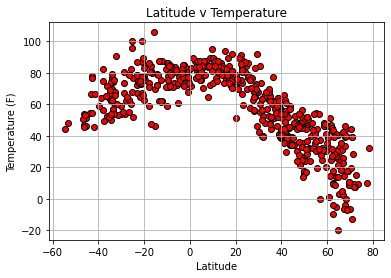

In [59]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

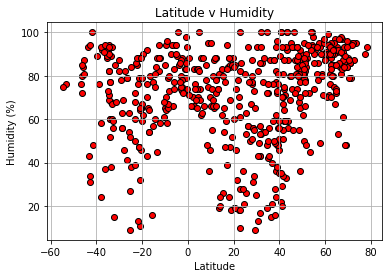

In [60]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

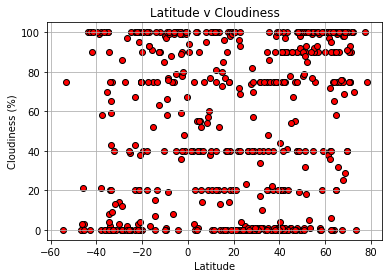

In [61]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

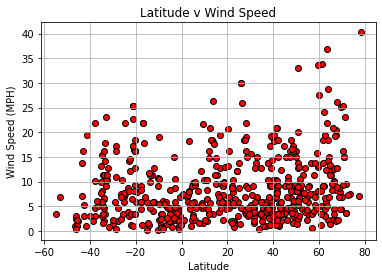

In [80]:
plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [81]:
NHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] >= 0,:]
SHcity_data_df = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7651558339964056


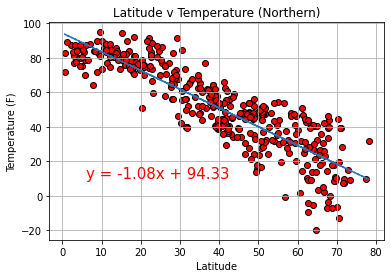

In [99]:
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"].astype(float), NHcity_data_df["Temperature"].astype(float))
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.30745112187731316


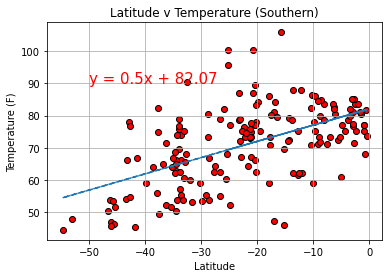

In [100]:
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Temperature (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"].astype(float), SHcity_data_df["Temperature"].astype(float))
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1180199036222713


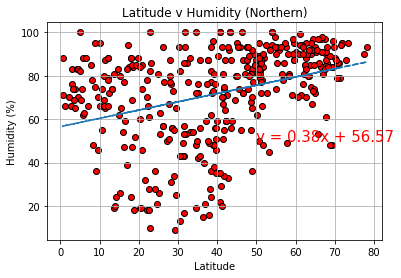

In [101]:
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"].astype(float), NHcity_data_df["Humidity"].astype(float))
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig7.png")

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01803184675665707


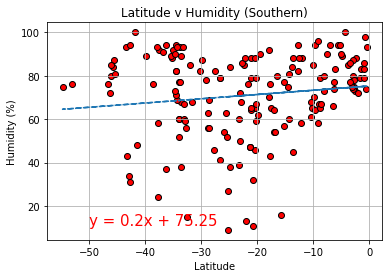

In [102]:
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Humidity (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"].astype(float), SHcity_data_df["Humidity"].astype(float))
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-50,11),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

AttributeError: 'float' object has no attribute 'shape'

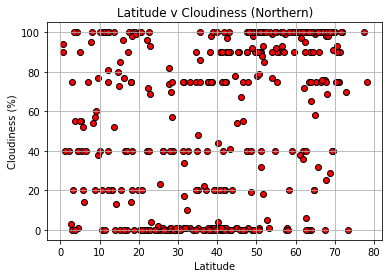

In [75]:
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"], NHcity_data_df["Cloudiness"])
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(13,8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig9.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11510249481223314


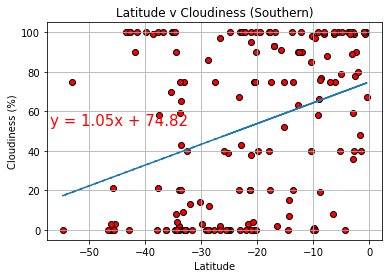

In [103]:
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Cloudiness"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"].astype(float), SHcity_data_df["Cloudiness"].astype(float))
reg_eq = slope * SHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-57,53),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02894994878146167


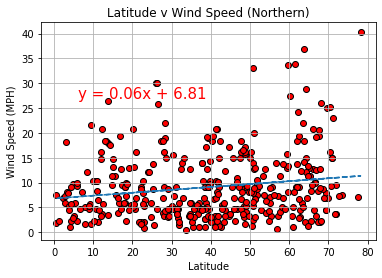

In [104]:
plt.scatter(NHcity_data_df["Latitude"], NHcity_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Wind Speed (Northern)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(NHcity_data_df["Latitude"].astype(float), NHcity_data_df["Wind Speed"].astype(float))
reg_eq = slope * NHcity_data_df["Latitude"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(NHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(6,27),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013053731451713959


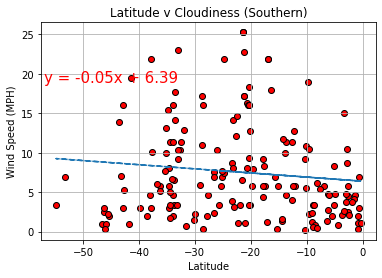

In [105]:
plt.scatter(SHcity_data_df["Latitude"], SHcity_data_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude v Cloudiness (Southern)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(SHcity_data_df["Latitude"].astype(float), SHcity_data_df["Wind Speed"].astype(float))
reg_eq = SHcity_data_df["Latitude"]*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(SHcity_data_df["Latitude"],reg_eq,"--")
plt.annotate(line_eq,(-57,19),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Fig12.png")

In [106]:
clean_city_data_df.to_csv("../output_data/cities.csv",
                  encoding="utf-8", index=False, header=True)